In [146]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.special import erfc, erfcinv

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


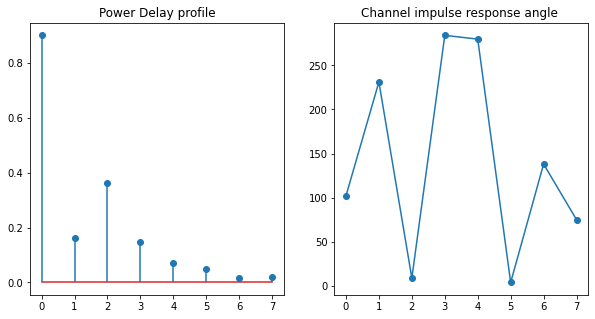

In [147]:
ser = 10**(-5) #Symbol error rate we want to achieve




mat = scipy.io.loadmat('CIR.mat')
mat['h'].shape
CIR = mat['h']
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.stem(np.abs(CIR))

plt.title("Power Delay profile")

plt.subplot(122)
plt.title("Channel impulse response angle ")
plt.plot(((180/np.pi) * np.angle(CIR))%360, '-o')
plt.show()



(8, 1)
(128, 1)


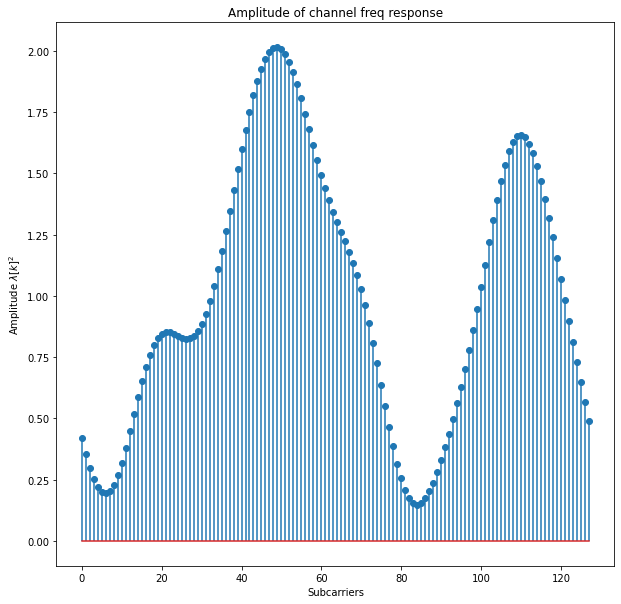

In [148]:
print(CIR.shape)
freqres = np.fft.fft(CIR,n=128, axis=0)
print(freqres.shape)
plt.figure(figsize = (10,10))
plt.stem(np.abs(freqres[:,:])**2)
plt.title("Amplitude of channel freq response")
plt.xlabel("Subcarriers")
plt.ylabel("Amplitude $\lambda [k]^2$")
plt.show()

Establish the general procedure for maximizing the available bit rate
by optimizing the allocated powers p k and the number of bits b k for a given channel impulse response (and hence frequency response) and
based on the constraints described above. In order to simplify the
procedure, it is assumed that b k is real and is not restricted to an
integer.

Implement this optimization procedure for the particular realization
of the channel impulse response provided to you for 3 different values
E s /N 0 = 0, 10 and 20 dB, and evaluate the gain (in terms of bit rate)
with respect to uniform power allocation and/or uniform bit allocation.



In [149]:
pe = ser
SNRGap = (2/3)*(erfcinv(pe/2))**2
SNRGapdb = 10*np.log10(SNRGap)
print("SNR gap is {:.2f}, which dives {:.2f} dB".format(SNRGap, SNRGapdb))

SNR gap is 6.95, which dives 8.42 dB


<StemContainer object of 3 artists>

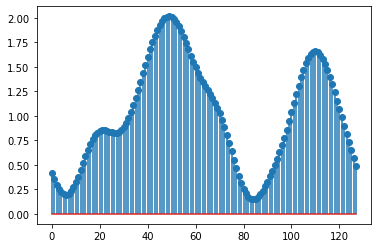

In [150]:
lambdai = np.zeros(freqres.shape)
lambdai[:,0] = np.abs(freqres[:,0])**2
plt.stem(lambdai)

Decision variable: 

$P_k$ = 0 si $\Gamma \sigma_{n,k}^2 > thresh$

avec
$\sigma_{n,k} = \frac{2N_0}{\lambda_i}$

Pmax = 128.00, N0 = 1.00
Pmax = 128.00, N0 = 1.00, Level = 3.16, channels used = 91.00


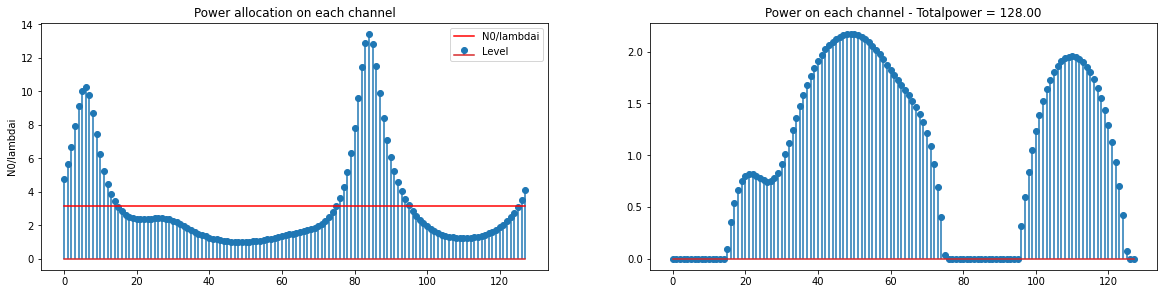

In [151]:
Pmax = 128 #On se fixe le pmax

esnodb = 0
esno = 10**(-esnodb/10)
N0 = (1/2)* (128/144) * (1/esno)
N0=1



print("Pmax = {:.2f}, N0 = {:.2f}".format(Pmax,N0))

level = 0
totalpower = 0

Pi = np.zeros(lambdai.shape)
while(totalpower<Pmax):
    level+=0.0001
    Pi[:] = level - 2*N0/lambdai[:]
    Pi[Pi<0]=0
    totalpower = np.sum(Pi)
    
channelsused = Pi>0
channelsused = np.sum(channelsused)

print("Pmax = {:.2f}, N0 = {:.2f}, Level = {:.2f}, channels used = {:.2f}".format(Pmax,N0,level,channelsused))
plt.figure(figsize = (20,10))
plt.subplot(221)
plt.stem(2*N0/lambdai)
plt.plot(np.ones(lambdai.shape)*level, '-r')
plt.legend(["N0/lambdai", "Level"])
plt.ylabel("N0/lambdai")
plt.title("Power allocation on each channel")


plt.subplot(222)
plt.stem(Pi)
plt.title("Power on each channel - Totalpower = {:.2f}".format(totalpower))
plt.show()
